In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

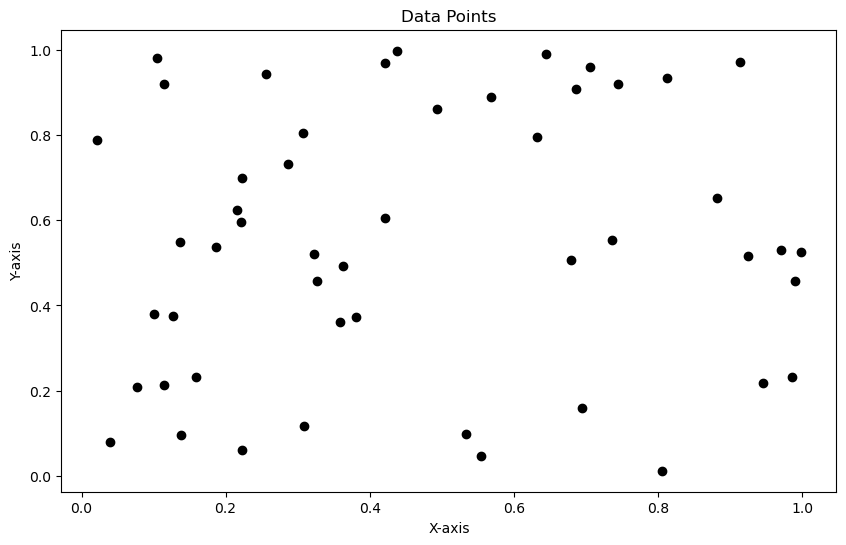

In [30]:
def plot_data(X):
    plt.figure(figsize=(10, 6))
    for i in range(len(X)):
        x, y = X[i, 0], X[i, 1]
        plt.plot(x, y, 'ko')  
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Data Points')
    plt.show()
X = np.random.rand(50, 2)  
plot_data(X)


In [31]:
def plot_clusters_with_centroids(data, cluster_centers, cluster_assignments, centroids):
    plt.figure(figsize=(10, 6))
    colors = ['b', 'g']

    for i in range(len(data)):
        x, y = data[i]
        plt.plot(x, y, 'o', color=colors[cluster_assignments[i]], markersize=8)

    for center in cluster_centers:
        plt.plot(center[0], center[1], 'x', color='r', markersize=15, markeredgewidth=3)

    for centroid in centroids:
        plt.plot(centroid[0], centroid[1], '*', color='y', markersize=15, markeredgewidth=3)

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('K-Means Clustering with Centroids')
    plt.grid(True)
    plt.show()



In [33]:
#centroids for the clusters
def random_centroid(X,k):
    random_idx=[np.random.randint(0,len(X)) for i in range(k)]
    centroids=[]
    for i in random_idx:
        centroids.append(X[i])
    return centroids

In [1]:
#determine which cluster the data point belongs to
def assign_cluster(X,ini_centroids,k):
    cluster=[]
    for i in range(len(X)):
        euc_dist=[]
        for j in range(k):
            euc_dist.append(np.linalg.norm(np.subtract(X[i]-ini_centroids[j])))
        idx=np.argmin(euc_dist)
        cluster.append(idx)
    return cluster

In [2]:
#Returns the updated centroids
def compute_centroids(X,cluster,k):
    centroids=[]
    for i in range(k):
        temp_arr=[]
        for j in range(len(X)):
            if cluster[j]==i:
                temp_arr.append(X[j])
        centroids.append(np.mean(temp_arr,axis=0))
    return np.array(centroids)



In [3]:
#returns the difference between the old and new centroids
def difference(prev,next):
    diff=0
    for i in range(len(prev)):
        diff+=np.linalg.norm(prev[i]-next[i])
    return diff

In [5]:
#used to plot in each iteration
def show_clusters(X,clusters,centroids,ini_centroids,mark_centroid=True, show_init_centroid=True, show_plots=True):
    cols={0:'r',1:'b',2:'g',3:'coral',4:'c',5:'lime'}
    fig, ax=plt.subplots(figsize=(7,5,6));
    for i in range(len(clusters)):
        ax.scatter(X[i,0],X[i,1],color=cols[clusters[i]])
    for j in range(len(centroids)):
        ax.scatter(centroids[j][0],centroids[j][1],marker='*',color=cols[j])
    if show_init_centroid== True:
        ax.scatter(ini_centroids[j][0],ini_centroids[j][1],marker='+',s=150,color=cols[j])
    if mark_centroid==True:
        for i in range(len(centroids)):
            ax.add_artist(plt.Circle((centroids[i][0],centroids[i][1]),0.4,linewidth=2, color='y',fill=False))
    if show_ini_centroid==True:
        ax.add_artist(plt.Circle((ini_centroids[i][0],ini_centroids[i][1]),0.4,linewidth=2,color='y',fill=False))
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('K-Means Clustering')
    if show_plots==True:
        plt.show()

In [8]:
# K-Means algorithm
def k_means(X, k, show_type='all', show_plots=True):
    c_prev = random_centroid(X, k)
    cluster = assign_cluster(X, c_prev, k)
    initial_centroids = c_prev
    diff = 100
    
    if show_plots:
        print("NOTE: + and Yellow Circle -> Initial centroid\n* and Black Circle -> Final Centroid")
    
    if show_plots:
        print("\n\nInitial Plot:")
        show_clusters(X, cluster, c_prev, initial_centroids, mark_centroid=False, show_initial_centroid=False)
    
    while diff > 0.0001:
        cluster = assign_cluster(X, c_prev, k)
        
        if show_type == 'all' and show_plots:
            show_clusters(X, cluster, c_prev, initial_centroids, mark_centroid=False, show_initial_centroid=False)
        
        c_new = compute_centroid(X, cluster, k)
        diff = max(np.linalg.norm(np.array(c_prev) - np.array(c_new)))
        c_prev = c_new
    
    if show_plots:
        print("\nInitial Cluster Centers:")
        print(initial_centroids)
        print("\nFinal Cluster Centers:")
        print(c_prev)
        
        print("\nFinal Plot:")
        show_clusters(X, cluster, c_prev, initial_centroids, mark_centroid=True, show_initial_centroid=True)
    
    return cluster, c_prev
